In [1]:
import geopandas as gpd
from libpysal import graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib_scalebar.scalebar import ScaleBar
import pandas as pd
import contextily as cx

In [2]:
signatures = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_orig.pq")

In [2]:
signatures = gpd.read_file("spatial_signatures_GB.gpkg")

In [4]:
signatures

id code                     type  \
0          0_COA  COA  Countryside agriculture   
1          1_COA  COA  Countryside agriculture   
2          2_COA  COA  Countryside agriculture   
3          3_COA  COA  Countryside agriculture   
4          4_COA  COA  Countryside agriculture   
...          ...  ...                      ...   
96699  96699_OUT  OUT                  outlier   
96700  96700_OUT  OUT                  outlier   
96701  96701_OUT  OUT                  outlier   
96702  96702_OUT  OUT                  outlier   
96703  96703_OUT  OUT                  outlier   

                                                geometry  
0      POLYGON ((62220.000 798500.000, 62110.000 7985...  
1      POLYGON ((63507.682 796515.169, 63471.097 7965...  
2      POLYGON ((65953.174 802246.172, 65950.620 8022...  
3      POLYGON ((67297.740 803435.800, 67220.289 8034...  
4      POLYGON ((75760.000 852670.000, 75700.000 8527...  
...                                                  ...  
96699  POLYGON ((323321.005 463795.416, 323319.842 46...  
96700  POLYGON ((325929.840 1008792.061, 325927.377 1...  
96701  POLYGON ((337804.770 1013422.583, 337800.122 1...  
96702  POLYGON ((422304.270 1147826.990, 422296.000 1...  
96703  POLYGON ((525396.260 439215.480, 525360.920 43...  

[96704 rows x 4 columns]

In [6]:
signatures.code.unique()

array(['COA', 'ACS', 'OPS', 'WIC', 'WAL', 'GRQ', 'URB', 'DIS', 'DRN',
       'CRN', 'DUN', 'LOU', 'DIU', 'REU', 'OUT', 'MEU', 'HDU'],
      dtype=object)

In [3]:
# drop an outlier island
signatures = signatures.drop(96691)

In [7]:
signatures_urban = signatures[~signatures.code.isin(["OUT", "COA", "URB", "WIC"])].copy()

In [8]:
signatures_urban

id code                         type  \
10882  10882_ACS  ACS          Accessible suburbia   
10883  10883_ACS  ACS          Accessible suburbia   
10884  10884_ACS  ACS          Accessible suburbia   
10885  10885_ACS  ACS          Accessible suburbia   
10886  10886_ACS  ACS          Accessible suburbia   
...          ...  ...                          ...   
96687  96687_HDU  HDU  Hyper concentrated urbanity   
96688  96688_HDU  HDU  Hyper concentrated urbanity   
96689  96689_HDU  HDU  Hyper concentrated urbanity   
96690  96690_HDU  HDU  Hyper concentrated urbanity   
96691  96691_HDU  HDU  Hyper concentrated urbanity   

                                                geometry  
10882  POLYGON ((143345.668 932691.413, 143345.418 93...  
10883  POLYGON ((151573.910 30042.750, 151571.029 300...  
10884  POLYGON ((151697.494 29760.709, 151650.000 297...  
10885  POLYGON ((162909.562 26425.073, 162911.932 264...  
10886  POLYGON ((164091.320 40526.696, 164093.601 405...  
...                                                  ...  
96687  POLYGON ((528602.732 181135.450, 528572.630 18...  
96688  POLYGON ((528643.907 181217.443, 528638.400 18...  
96689  POLYGON ((528734.582 181316.822, 528732.783 18...  
96690  POLYGON ((530336.433 181039.755, 530336.117 18...  
96691  POLYGON ((581275.000 184964.000, 581431.000 18...  

[68957 rows x 4 columns]

In [9]:
%%time
contiguity = graph.Graph.build_fuzzy_contiguity(signatures_urban, buffer=1)

CPU times: user 2min 16s, sys: 2.21 s, total: 2min 18s
Wall time: 2min 18s


In [10]:
%%time
signatures_urban["settlement"] = contiguity.component_labels

CPU times: user 16.2 ms, sys: 0 ns, total: 16.2 ms
Wall time: 15.6 ms


In [8]:
types = {
    "0_0": "Countryside agriculture",
    "1_0": "Accessible suburbia",
    "3_0": "Open sprawl",
    "4_0": "Wild countryside",
    "5_0": "Warehouse/Park land",
    "6_0": "Gridded residential quarters",
    "7_0": "Urban buffer",
    "8_0": "Disconnected suburbia",
    "2_0": "Dense residential neighbourhoods",
    "2_1": "Connected residential neighbourhoods",
    "2_2": "Dense urban neighbourhoods",
    "9_0": "Local urbanity",
    "9_1": "Concentrated urbanity",
    "9_2": "Regional urbanity",
    "9_4": "Metropolitan urbanity",
    "9_5": "Hyper concentrated urbanity",
}

signatures_urban["signature_type"] = signatures_urban["signature_type"].map(types)

In [11]:
signatures_urban.settlement.max()

9436

In [12]:
signatures_urban["area"] = signatures_urban.area

In [13]:
grouper = signatures_urban.groupby(["settlement", "type"])
areas = grouper["area"].sum().unstack().fillna(0)

In [14]:
areas

type        Accessible suburbia  Concentrated urbanity  \
settlement                                               
0                  98432.753668                    0.0   
1                  39159.397355                    0.0   
2                   1714.392324                    0.0   
3                 194126.224307                    0.0   
4                     98.243984                    0.0   
...                         ...                    ...   
9432                   0.000000                    0.0   
9433                   0.000000                    0.0   
9434                   0.000000                    0.0   
9435                   0.000000                    0.0   
9436                   0.000000                    0.0   

type        Connected residential neighbourhoods  \
settlement                                         
0                                  658585.378043   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                   14951.756016   
...                                          ...   
9432                                    0.000000   
9433                                    0.000000   
9434                                    0.000000   
9435                                    0.000000   
9436                                    0.000000   

type        Dense residential neighbourhoods  Dense urban neighbourhoods  \
settlement                                                                 
0                               82103.007472                16858.821454   
1                                   0.000000                    0.000000   
2                                   0.000000                    0.000000   
3                                   0.000000                    0.000000   
4                                   0.000000                    0.000000   
...                                      ...                         ...   
9432                                0.000000                    0.000000   
9433                                0.000000                    0.000000   
9434                                0.000000                    0.000000   
9435                                0.000000                    0.000000   
9436                                0.000000                    0.000000   

type        Disconnected suburbia  Gridded residential quarters  \
settlement                                                        
0                    3.867427e+04                 194436.499973   
1                    4.303130e+03                      0.000000   
2                    0.000000e+00                      0.000000   
3                    1.116033e+06                 245226.403996   
4                    0.000000e+00                      0.000000   
...                           ...                           ...   
9432                 0.000000e+00                      0.000000   
9433                 0.000000e+00                      0.000000   
9434                 0.000000e+00                      0.000000   
9435                 0.000000e+00                      0.000000   
9436                 0.000000e+00                      0.000000   

type        Hyper concentrated urbanity  Local urbanity  \
settlement                                                
0                                   0.0             0.0   
1                                   0.0             0.0   
2                                   0.0             0.0   
3                                   0.0             0.0   
4                                   0.0             0.0   
...                                 ...             ...   
9432                                0.0             0.0   
9433                                0.0             0.0   
9434                                0.0             0.0   
9435                                0.0             0.0   

In [15]:
order = [
       'Warehouse/Park land', 'Open sprawl', 'Disconnected suburbia',
       'Accessible suburbia', 'Connected residential neighbourhoods',
       'Dense residential neighbourhoods', 'Gridded residential quarters',
       'Dense urban neighbourhoods', 'Local urbanity', 'Regional urbanity',
       'Metropolitan urbanity', 'Concentrated urbanity',
       'Hyper concentrated urbanity'
    ]
order.reverse()

In [16]:
areas_sorted = areas.sort_values(order, ascending=False)[order]

<Axes: xlabel='settlement', ylabel='type'>

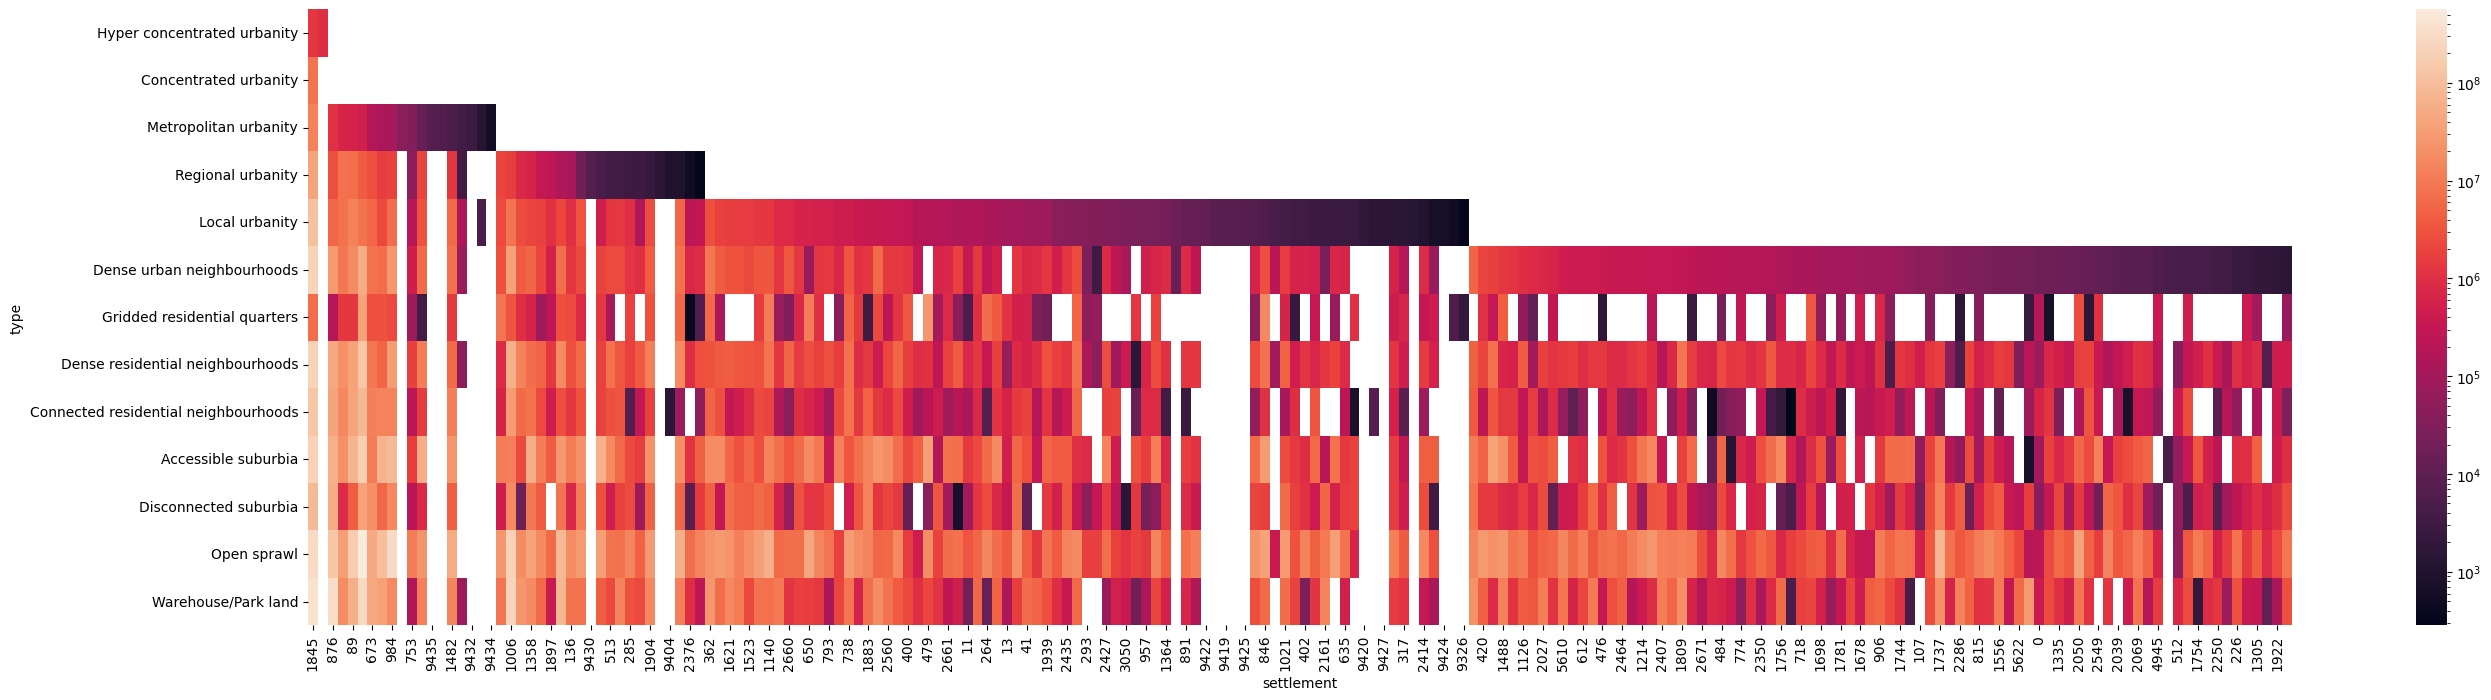

In [17]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.iloc[:200].T, norm=LogNorm())

In [18]:
areas["total"] = areas.sum(axis=1)
areas.sort_values("total")

type        Accessible suburbia  Concentrated urbanity  \
settlement                                               
3981               0.000000e+00           0.000000e+00   
5126               0.000000e+00           0.000000e+00   
6706               0.000000e+00           0.000000e+00   
8593               0.000000e+00           0.000000e+00   
3588               0.000000e+00           0.000000e+00   
...                         ...                    ...   
984                8.444854e+07           0.000000e+00   
1006               1.173756e+07           0.000000e+00   
876                6.251046e+07           0.000000e+00   
407                1.885914e+08           0.000000e+00   
1845               2.132323e+08           7.884144e+06   

type        Connected residential neighbourhoods  \
settlement                                         
3981                                0.000000e+00   
5126                                0.000000e+00   
6706                                0.000000e+00   
8593                                0.000000e+00   
3588                                0.000000e+00   
...                                          ...   
984                                 1.337555e+07   
1006                                3.097936e+07   
876                                 4.149977e+07   
407                                 8.382661e+07   
1845                                1.364017e+08   

type        Dense residential neighbourhoods  Dense urban neighbourhoods  \
settlement                                                                 
3981                            0.000000e+00                0.000000e+00   
5126                            0.000000e+00                0.000000e+00   
6706                            0.000000e+00                0.000000e+00   
8593                            0.000000e+00                0.000000e+00   
3588                            0.000000e+00                0.000000e+00   
...                                      ...                         ...   
984                             3.137510e+07                2.479331e+07   
1006                            5.928168e+07                3.574174e+07   
876                             4.842811e+07                2.758493e+07   
407                             1.443043e+08                5.427237e+07   
1845                            2.235081e+08                2.201192e+08   

type        Disconnected suburbia  Gridded residential quarters  \
settlement                                                        
3981                 0.000000e+00                  0.000000e+00   
5126                 0.000000e+00                  0.000000e+00   
6706                 0.000000e+00                  0.000000e+00   
8593                 0.000000e+00                  0.000000e+00   
3588                 0.000000e+00                  0.000000e+00   
...                           ...                           ...   
984                  1.552982e+07                  2.332107e+06   
1006                 1.610781e+07                  3.138634e+06   
876                  5.417000e+07                  1.721331e+05   
407                  3.735568e+07                  3.914361e+07   
1845                 8.389185e+07                  6.699935e+06   

type        Hyper concentrated urbanity  Local urbanity  \
settlement                                                
3981                       0.000000e+00    0.000000e+00   
5126                       0.000000e+00    0.000000e+00   
6706                       0.000000e+00    0.000000e+00   
8593                       0.000000e+00    0.000000e+00   
3588                       0.000000e+00    0.000000e+00   
...                                 ...             ...   
984                        0.000000e+00    6.522618e+06   
1006                       0.000000e+00    8.388703e+06   
876                        0.000000e+00    5.745378e+06   
407                        0.000000e+00    7.917305e+06   

<Axes: ylabel='Frequency'>

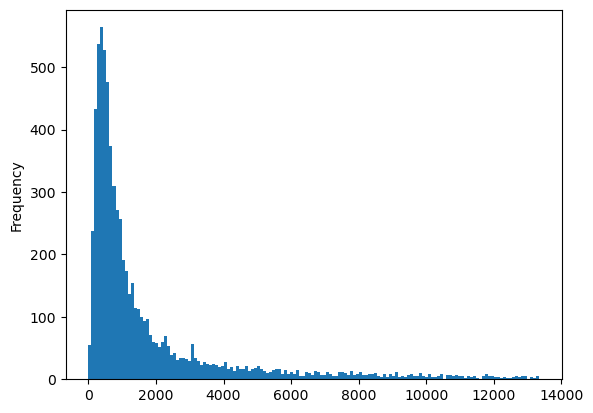

In [19]:
areas["total"][areas["total"]<areas["total"].quantile(.75)].plot.hist(bins=150)

In [20]:
areas["total"].quantile(.25)

534.3932255090165

In [21]:
areas["total"].median()

1345.9874175296875

<Axes: xlabel='settlement', ylabel='type'>

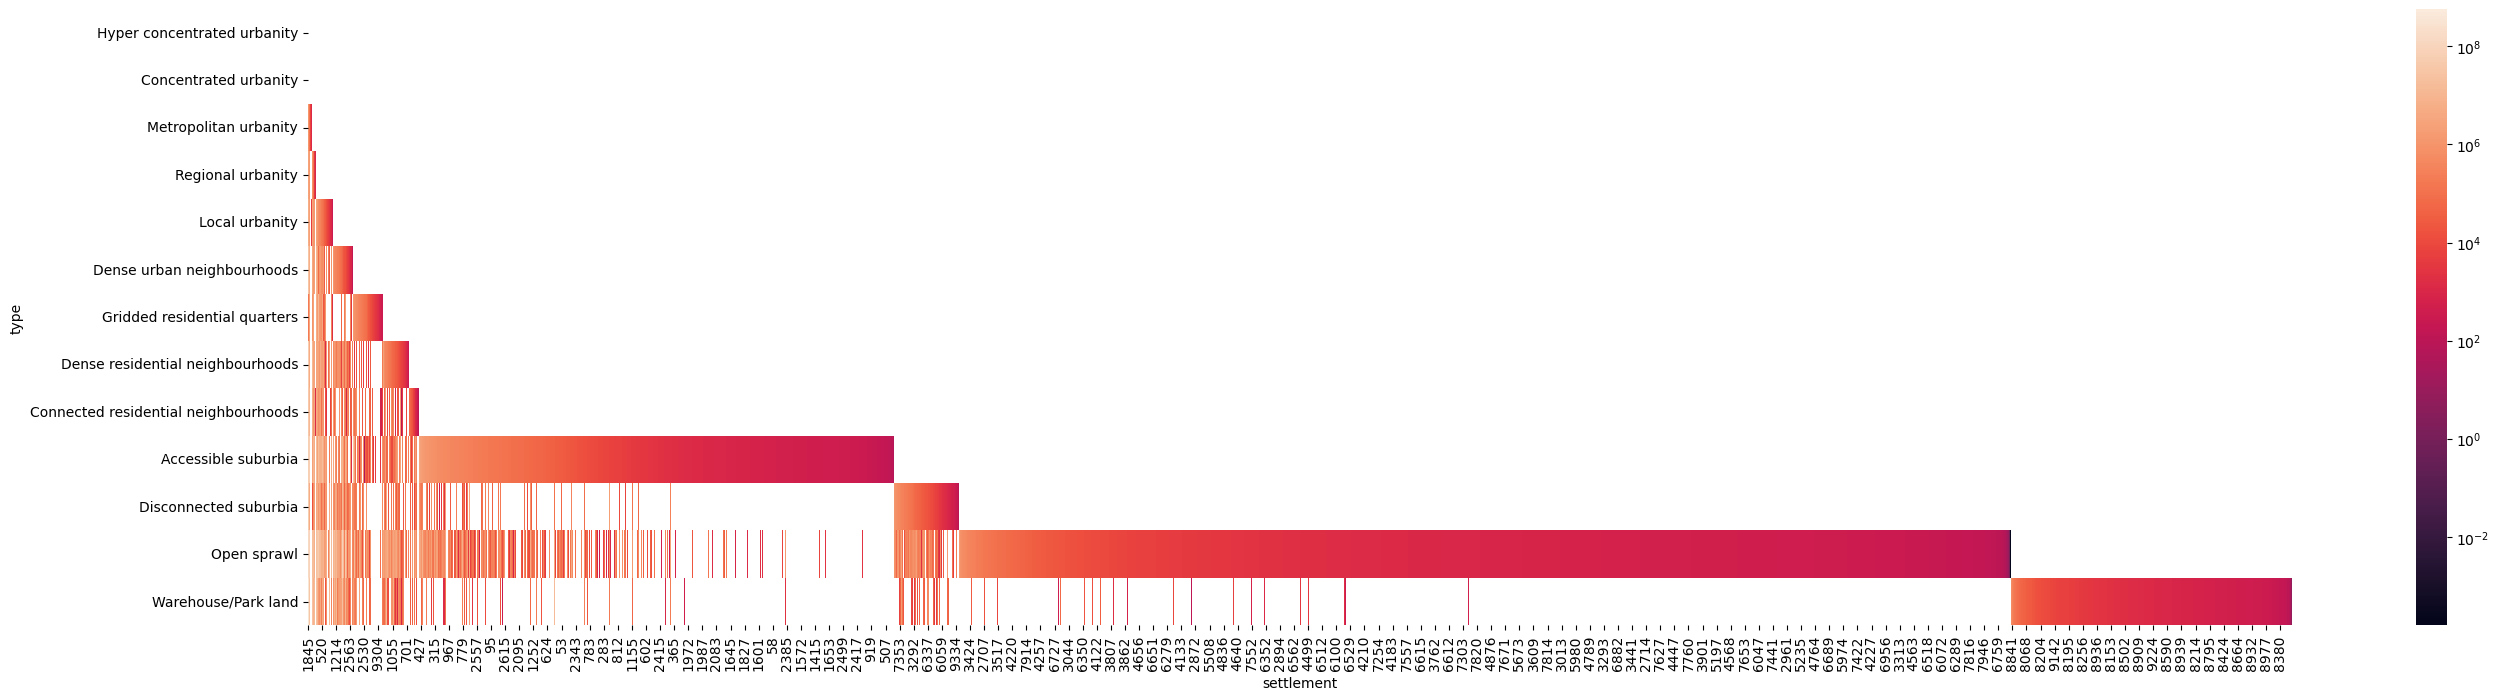

In [22]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm())

In [23]:
placenames = gpd.read_parquet("place.parquet")

In [24]:
%%time
joined = placenames.sjoin(signatures_urban[["geometry", "settlement"]])

CPU times: user 3.14 s, sys: 0 ns, total: 3.14 s
Wall time: 3.14 s


In [25]:
signatures_urban

id code                         type  \
10882  10882_ACS  ACS          Accessible suburbia   
10883  10883_ACS  ACS          Accessible suburbia   
10884  10884_ACS  ACS          Accessible suburbia   
10885  10885_ACS  ACS          Accessible suburbia   
10886  10886_ACS  ACS          Accessible suburbia   
...          ...  ...                          ...   
96687  96687_HDU  HDU  Hyper concentrated urbanity   
96688  96688_HDU  HDU  Hyper concentrated urbanity   
96689  96689_HDU  HDU  Hyper concentrated urbanity   
96690  96690_HDU  HDU  Hyper concentrated urbanity   
96691  96691_HDU  HDU  Hyper concentrated urbanity   

                                                geometry  settlement  \
10882  POLYGON ((143345.668 932691.413, 143345.418 93...           0   
10883  POLYGON ((151573.910 30042.750, 151571.029 300...           1   
10884  POLYGON ((151697.494 29760.709, 151650.000 297...           1   
10885  POLYGON ((162909.562 26425.073, 162911.932 264...           2   
10886  POLYGON ((164091.320 40526.696, 164093.601 405...           3   
...                                                  ...         ...   
96687  POLYGON ((528602.732 181135.450, 528572.630 18...        1845   
96688  POLYGON ((528643.907 181217.443, 528638.400 18...        1845   
96689  POLYGON ((528734.582 181316.822, 528732.783 18...        1845   
96690  POLYGON ((530336.433 181039.755, 530336.117 18...        1845   
96691  POLYGON ((581275.000 184964.000, 581431.000 18...        9436   

               area  
10882  9.843275e+04  
10883  2.597607e+03  
10884  3.656179e+04  
10885  1.714392e+03  
10886  1.941262e+05  
...             ...  
96687  1.797907e+03  
96688  1.271663e+06  
96689  1.872188e+03  
96690  2.767724e+03  
96691  9.875395e+05  

[68957 rows x 6 columns]

In [26]:
with_names = signatures_urban[signatures_urban.settlement.isin(joined.settlement)]

In [27]:
with_names.settlement.nunique()

1206

In [28]:
no_names = signatures_urban[~signatures_urban.settlement.isin(joined.settlement)]

In [29]:
no_names.settlement

10883       1
10884       1
10885       2
10887       4
10889       6
         ... 
96594    9432
96647    9433
96648    9434
96658    9435
96691    9436
Name: settlement, Length: 10436, dtype: int32

In [31]:
grouper = with_names.groupby(["settlement", "type"])
areas = grouper["area"].sum().unstack().fillna(0)

In [32]:
areas_sorted = areas.sort_values(order, ascending=False)[order]

In [33]:
joined

local_type                       geometry                name1  \
2023027     Suburban Area  POINT (418095.000 185406.000)                Nythe   
2049081     Suburban Area  POINT (417576.000 184893.000)           Park North   
2023028     Suburban Area   POINT (292127.000 90785.000)         Marsh Barton   
2023029     Suburban Area   POINT (295991.000 91247.000)          Clyst Heath   
2040633     Suburban Area   POINT (294268.000 91766.000)            St Loye's   
...                   ...                            ...                  ...   
2287377     Suburban Area  POINT (430095.000 581544.000)       Malvin's Close   
2288413  Other Settlement  POINT (395461.000 395566.000)  The Railway Sidings   
2288557  Other Settlement   POINT (206144.000 67004.000)             Town End   
2288563  Other Settlement  POINT (465287.000 103797.000)         Vicarage Row   
2288564  Other Settlement  POINT (465332.000 103793.000)     St Francis Court   

         index_right  settlement  
2023027        73480        1021  
2049081        73480        1021  
2023028        46382         285  
2023029        23788         285  
2040633        23788         285  
...              ...         ...  
2287377        30755        1006  
2288413        87974         407  
2288557        21978          25  
2288563        58015        1508  
2288564        58015        1508  

[10561 rows x 5 columns]

<Axes: xlabel='settlement', ylabel='type'>

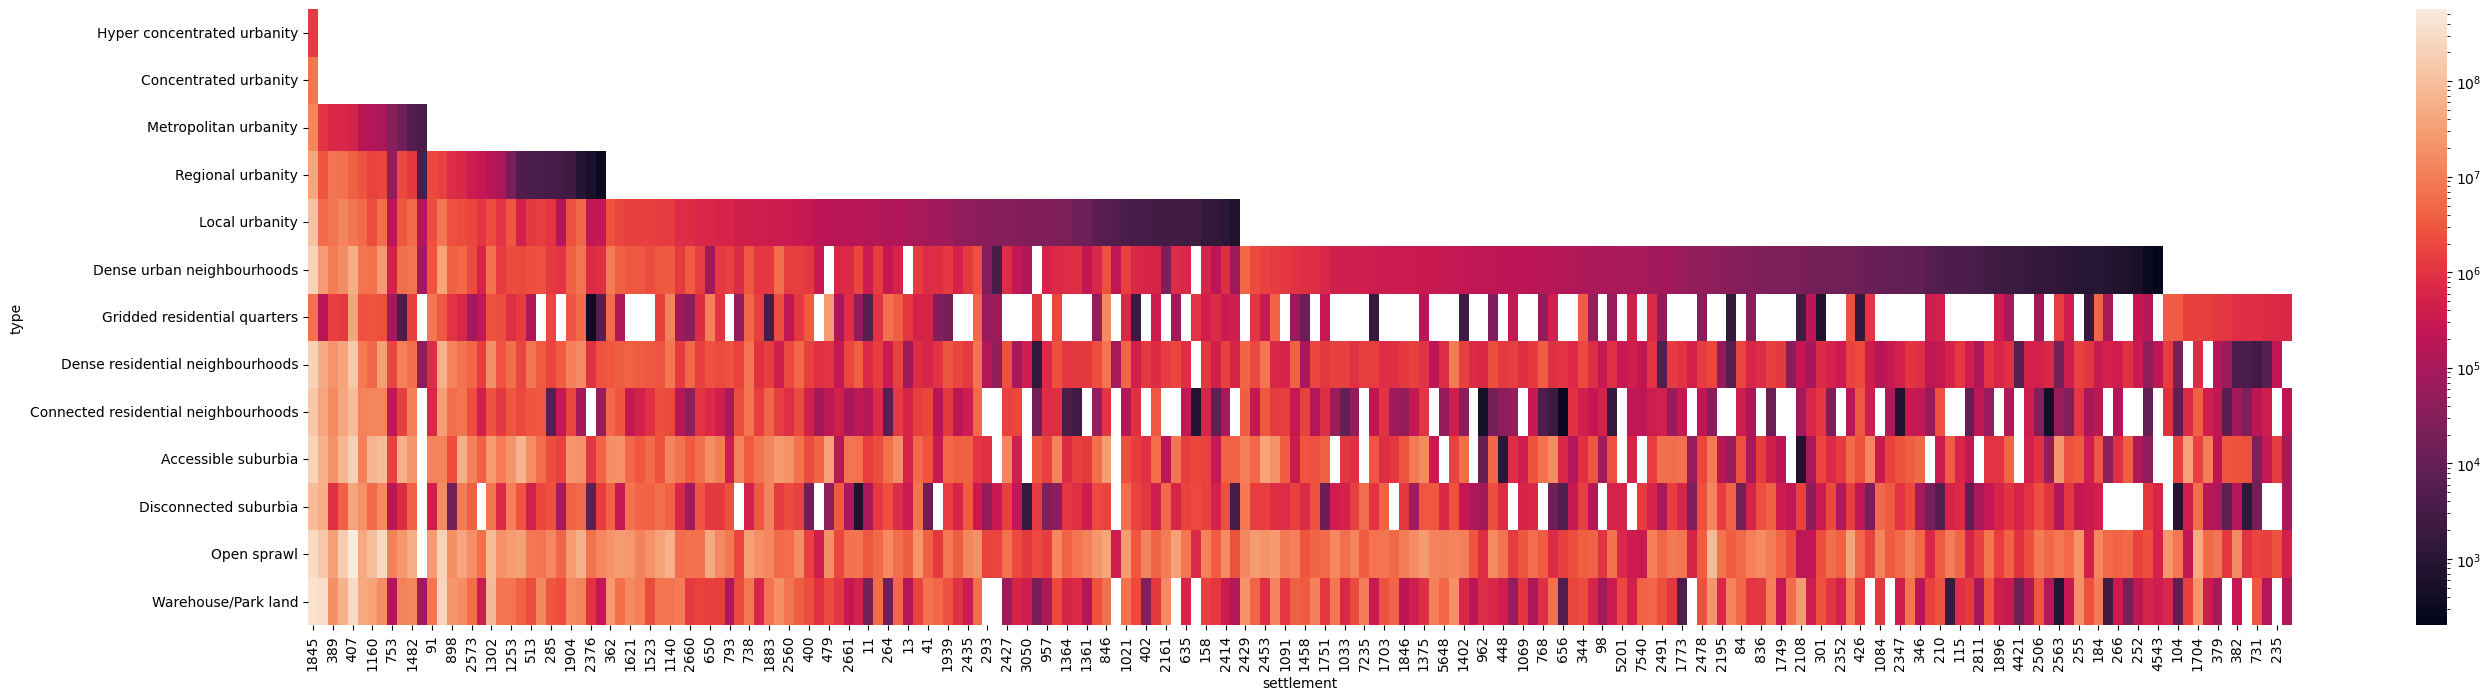

In [34]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.iloc[:200].T, norm=LogNorm())

<Axes: xlabel='settlement', ylabel='type'>

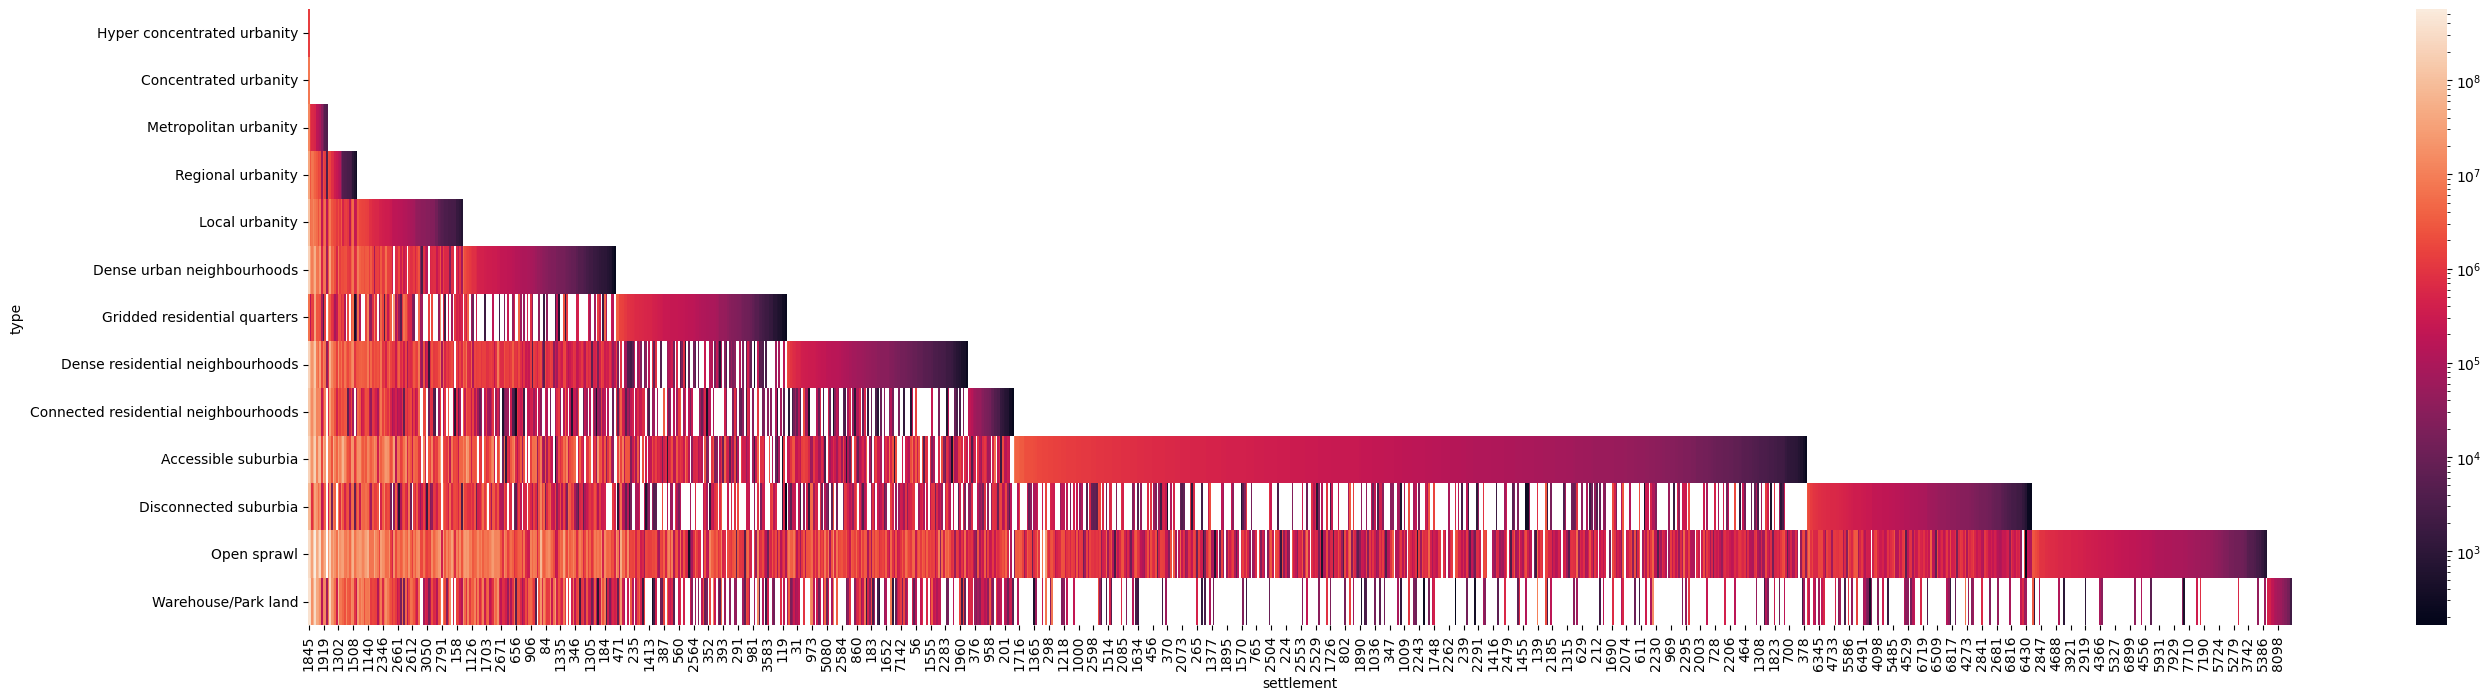

In [35]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm())

<Axes: xlabel='settlement', ylabel='type'>

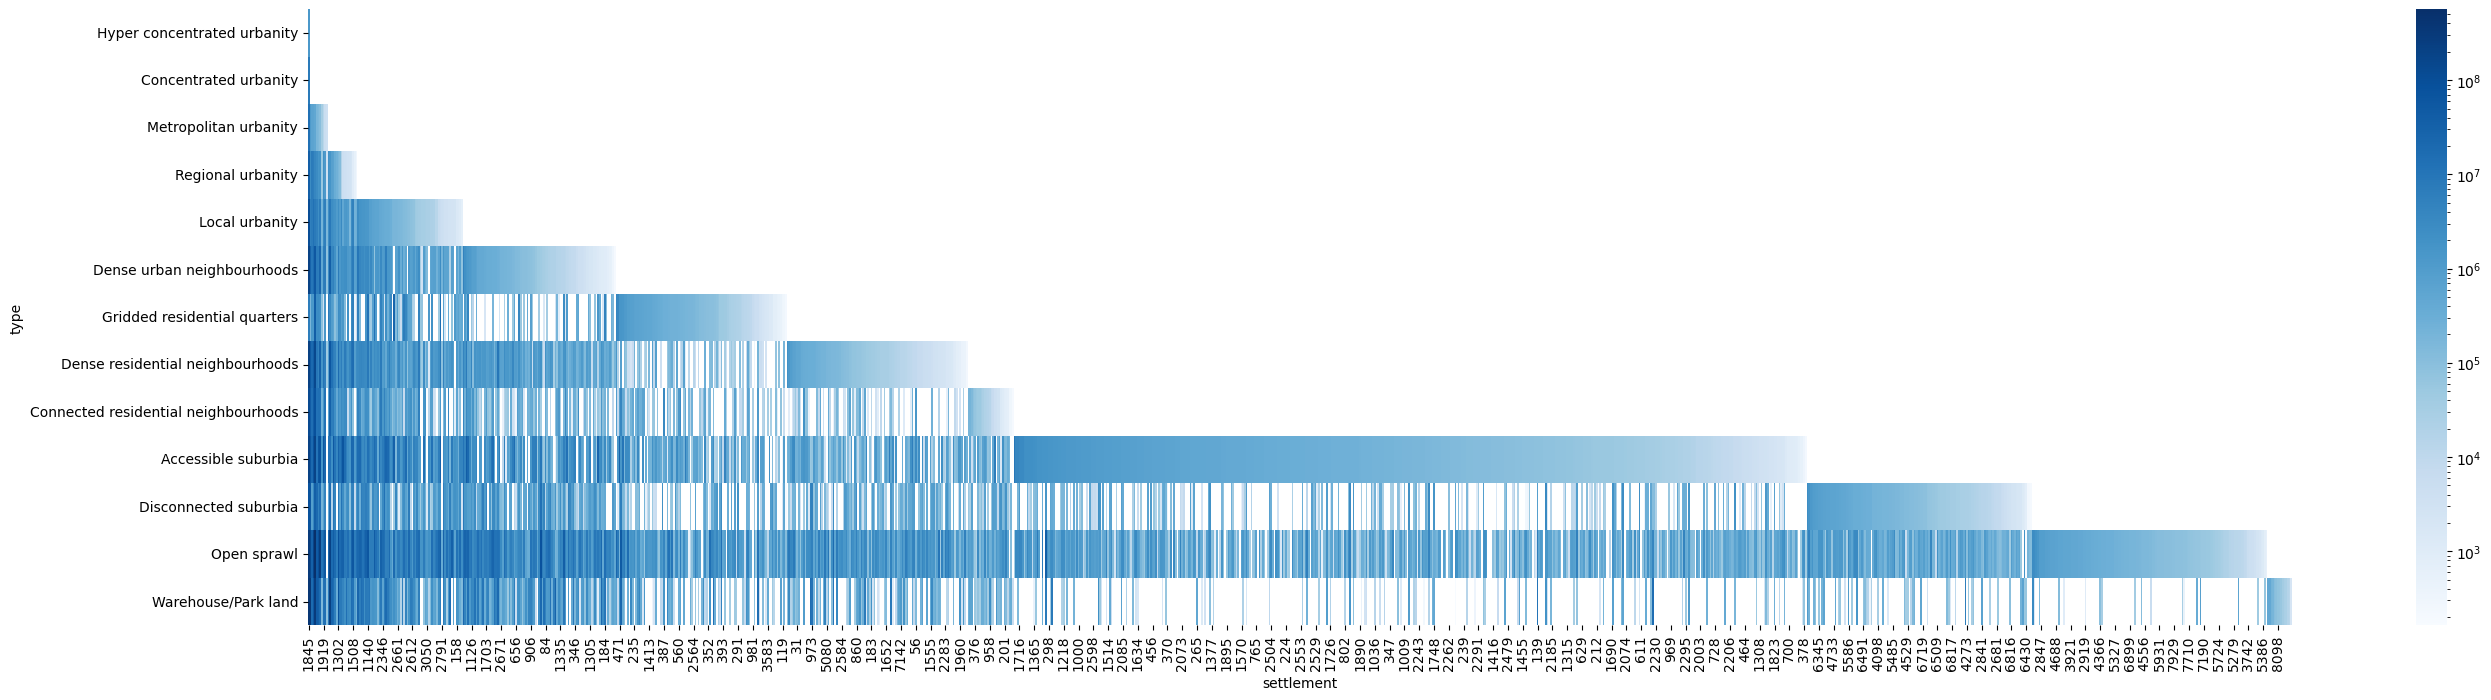

In [36]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm(), cmap="Blues")

In [37]:
import urbangrammar_graphics as ugg
from matplotlib.colors import LinearSegmentedColormap

In [38]:
ugg.COLORS

[(0.19921875, 0.203125, 0.1953125),
 (0.23046875, 0.4296875, 0.55078125),
 (0.73828125, 0.35546875, 0.30859375),
 (0.5625, 0.640625, 0.4921875),
 (0.9375, 0.78125, 0.34375),
 (0.58203125, 0.3984375, 0.4296875)]

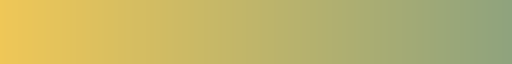

In [39]:
cmap = LinearSegmentedColormap.from_list("ugg", [ugg.COLORS[4], ugg.COLORS[3]])
cmap

In [58]:
areas_sorted

type        Hyper concentrated urbanity  Concentrated urbanity  \
settlement                                                       
1845                       1.306332e+06           7.884144e+06   
876                        0.000000e+00           0.000000e+00   
389                        0.000000e+00           0.000000e+00   
89                         0.000000e+00           0.000000e+00   
407                        0.000000e+00           0.000000e+00   
...                                 ...                    ...   
8150                       0.000000e+00           0.000000e+00   
7967                       0.000000e+00           0.000000e+00   
9059                       0.000000e+00           0.000000e+00   
8161                       0.000000e+00           0.000000e+00   
8136                       0.000000e+00           0.000000e+00   

type        Metropolitan urbanity  Regional urbanity  Local urbanity  \
settlement                                                             
1845                 1.321113e+07       3.960246e+07    1.155779e+08   
876                  1.075760e+06       2.806010e+06    5.745378e+06   
389                  6.359560e+05       7.521293e+06    7.460783e+06   
89                   6.071265e+05       6.881265e+06    1.262601e+07   
407                  5.156702e+05       3.950296e+06    7.917305e+06   
...                           ...                ...             ...   
8150                 0.000000e+00       0.000000e+00    0.000000e+00   
7967                 0.000000e+00       0.000000e+00    0.000000e+00   
9059                 0.000000e+00       0.000000e+00    0.000000e+00   
8161                 0.000000e+00       0.000000e+00    0.000000e+00   
8136                 0.000000e+00       0.000000e+00    0.000000e+00   

type        Dense urban neighbourhoods  Gridded residential quarters  \
settlement                                                             
1845                      2.201192e+08                  6.699935e+06   
876                       2.758493e+07                  1.721331e+05   
389                       9.309406e+06                  1.394896e+06   
89                        1.710456e+07                  1.253209e+06   
407                       5.427237e+07                  3.914361e+07   
...                                ...                           ...   
8150                      0.000000e+00                  0.000000e+00   
7967                      0.000000e+00                  0.000000e+00   
9059                      0.000000e+00                  0.000000e+00   
8161                      0.000000e+00                  0.000000e+00   
8136                      0.000000e+00                  0.000000e+00   

type        Dense residential neighbourhoods  \
settlement                                     
1845                            2.235081e+08   
876                             4.842811e+07   
389                             2.096403e+07   
89                              3.929345e+07   
407                             1.443043e+08   
...                                      ...   
8150                            0.000000e+00   
7967                            0.000000e+00   
9059                            0.000000e+00   
8161                            0.000000e+00   
8136                            0.000000e+00   

type        Connected residential neighbourhoods  Accessible suburbia  \
settlement                                                              
1845                                1.364017e+08         2.132323e+08   
876                                 4.149977e+07         6.251046e+07   
389                                 1.544039e+07         2.041219e+07   
89                                  4.141944e+07         7.314527e+07   
407                                 8.382661e+07         1.885914e+08   
...                                          ...                  ...   
8150                                0.000000e+00         0

<Axes: xlabel='settlement', ylabel='type'>

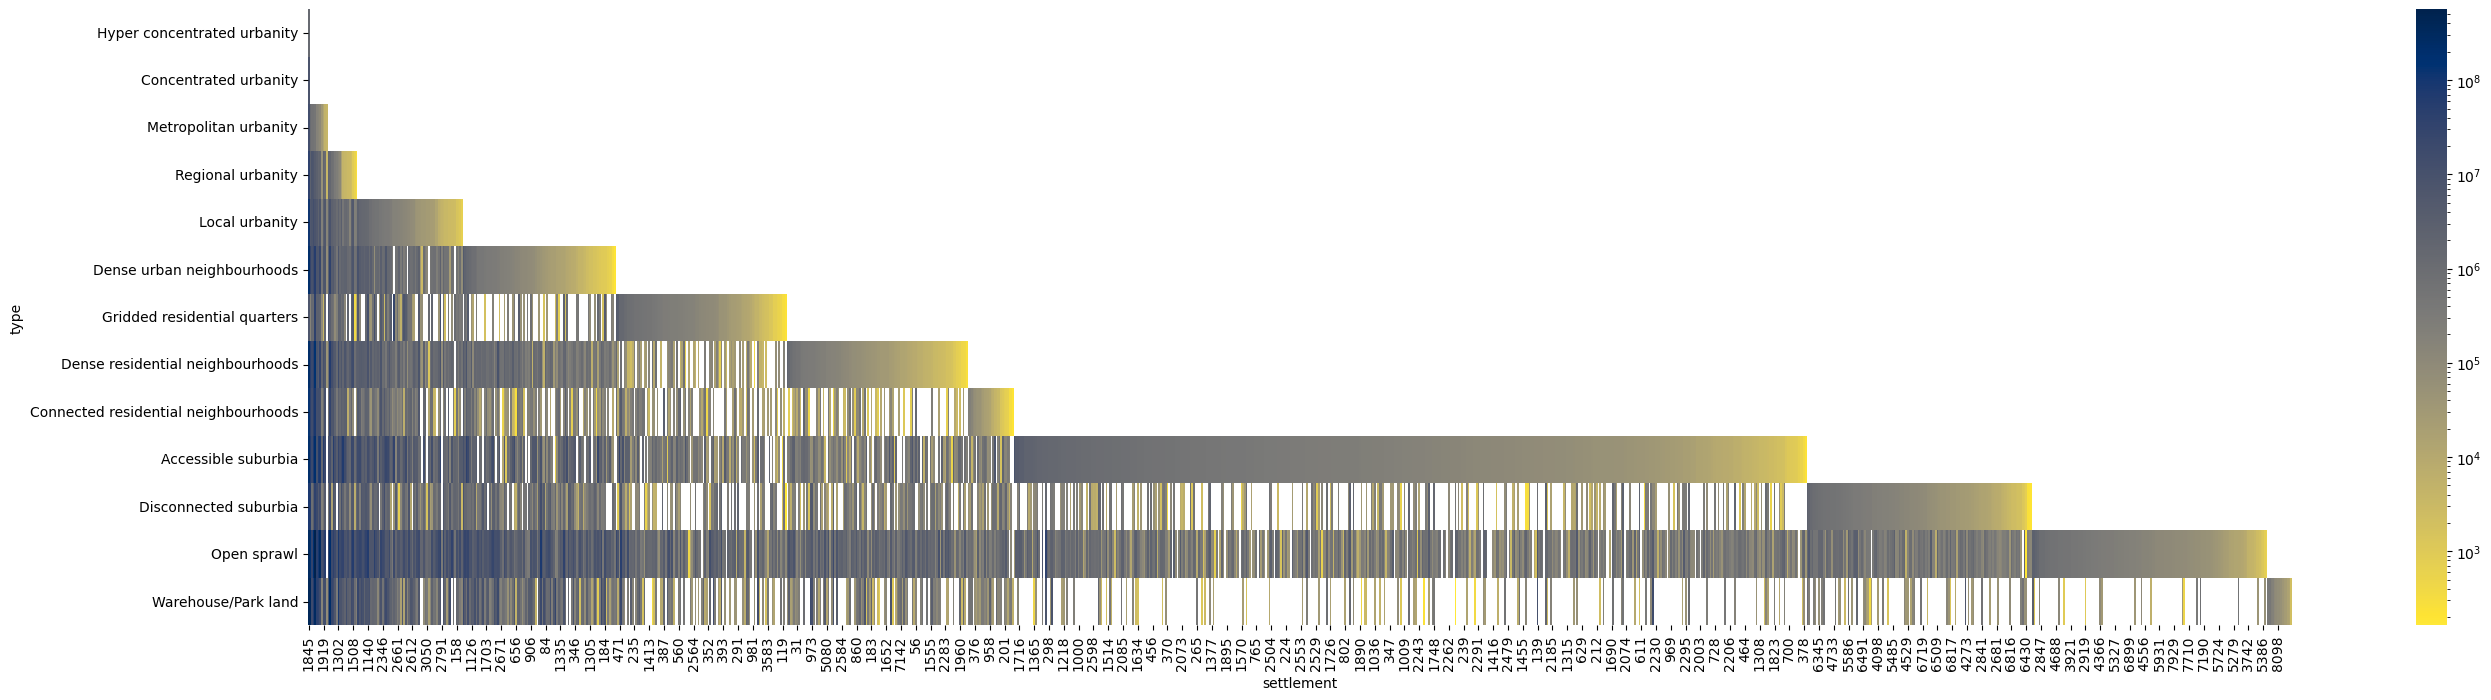

In [40]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm(), cmap="cividis_r")

In [41]:
placenames

local_type                       geometry                 name1
2023027     Suburban Area  POINT (418095.000 185406.000)                 Nythe
2023028     Suburban Area   POINT (292127.000 90785.000)          Marsh Barton
2023029     Suburban Area   POINT (295991.000 91247.000)           Clyst Heath
2023030     Suburban Area   POINT (233883.000 84586.000)  Kensey Valley Meadow
2023031     Suburban Area   POINT (293538.000 93365.000)               Polsloe
...                   ...                            ...                   ...
2289904  Other Settlement  POINT (199430.000 907051.000)          Garadheancal
2289905  Other Settlement  POINT (636776.000 151377.000)       Wingfield Place
2289906     Suburban Area  POINT (480934.000 263680.000)            Blackthorn
2289907            Hamlet  POINT (140772.000 799096.000)             Raonapoll
2289908     Suburban Area  POINT (249437.000 628134.000)      Hillhead Heights

[43209 rows x 3 columns]

In [42]:
with_names

id code                         type  \
10882  10882_ACS  ACS          Accessible suburbia   
10886  10886_ACS  ACS          Accessible suburbia   
10888  10888_ACS  ACS          Accessible suburbia   
10893  10893_ACS  ACS          Accessible suburbia   
10895  10895_ACS  ACS          Accessible suburbia   
...          ...  ...                          ...   
96686  96686_HDU  HDU  Hyper concentrated urbanity   
96687  96687_HDU  HDU  Hyper concentrated urbanity   
96688  96688_HDU  HDU  Hyper concentrated urbanity   
96689  96689_HDU  HDU  Hyper concentrated urbanity   
96690  96690_HDU  HDU  Hyper concentrated urbanity   

                                                geometry  settlement  \
10882  POLYGON ((143345.668 932691.413, 143345.418 93...           0   
10886  POLYGON ((164091.320 40526.696, 164093.601 405...           3   
10888  POLYGON ((167653.791 43194.946, 167654.353 431...           5   
10893  POLYGON ((170174.747 41387.203, 170172.782 413...           8   
10895  POLYGON ((175356.122 54184.967, 175365.952 541...          10   
...                                                  ...         ...   
96686  POLYGON ((528530.170 181095.720, 528544.720 18...        1845   
96687  POLYGON ((528602.732 181135.450, 528572.630 18...        1845   
96688  POLYGON ((528643.907 181217.443, 528638.400 18...        1845   
96689  POLYGON ((528734.582 181316.822, 528732.783 18...        1845   
96690  POLYGON ((530336.433 181039.755, 530336.117 18...        1845   

               area  
10882  9.843275e+04  
10886  1.941262e+05  
10888  9.879056e+03  
10893  1.610704e+05  
10895  6.876061e+03  
...             ...  
96686  2.823163e+04  
96687  1.797907e+03  
96688  1.271663e+06  
96689  1.872188e+03  
96690  2.767724e+03  

[58521 rows x 6 columns]

In [157]:
placenames.local_type.unique()

array(['Suburban Area', 'Hamlet', 'Village', 'Other Settlement', 'Town',
       'City'], dtype=object)

In [44]:
with_names.groupby("settlement")["type"].nunique().value_counts() / with_names.settlement.nunique()

type
2     0.285240
3     0.173300
1     0.145108
4     0.117745
5     0.068823
6     0.064677
7     0.050580
8     0.040630
9     0.033167
10    0.011609
11    0.008292
13    0.000829
Name: count, dtype: float64

In [45]:
%%time
settlement_boundaries = with_names[["geometry", "settlement"]].dissolve("settlement")

CPU times: user 1min 28s, sys: 33.3 ms, total: 1min 28s
Wall time: 1min 28s


In [46]:
names = []
for poly in settlement_boundaries.geometry:
    names_in = placenames.iloc[placenames.sindex.query(poly, predicate="contains")]
    if names_in.shape[0] == 1:
        names.append(names_in.name1.iloc[0])
    elif (names_in.local_type == "City").any():
        names.append(names_in[names_in.local_type == "City"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Town").any():
        names.append(names_in[names_in.local_type == "Town"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Suburban Area").any():
        names.append(names_in[names_in.local_type == "Suburban Area"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Village").any():
        names.append(names_in[names_in.local_type == "Village"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Hamlet").any():
        names.append(names_in[names_in.local_type == "Hamlet"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Other Settlement").any():
        names.append(names_in[names_in.local_type == "Other Settlement"].name1.str.cat(sep=' - '))
    else:
        names.append(None)

In [47]:
settlement_boundaries["name"] = names

In [48]:
settlement_boundaries

geometry  \
settlement                                                      
0           POLYGON ((142667.472 932126.244, 142647.194 93...   
3           POLYGON ((163950.904 40031.623, 163950.405 400...   
5           MULTIPOLYGON (((166904.881 42824.079, 166903.3...   
8           POLYGON ((169788.398 41575.672, 169777.856 415...   
10          POLYGON ((175581.974 54311.766, 175582.008 543...   
...                                                       ...   
8968        POLYGON ((501071.199 203479.014, 501071.401 20...   
8996        POLYGON ((504988.264 302841.508, 504992.439 30...   
9059        POLYGON ((515161.410 416170.202, 515161.543 41...   
9230        POLYGON ((560071.598 165353.771, 560073.233 16...   
9273        POLYGON ((584270.281 332038.541, 584270.333 33...   

                            name  
settlement                        
0                      Stornoway  
3                       Camborne  
5                        Illogan  
8                        Redruth  
10                   Perranporth  
...                          ...  
8968                   Bovingdon  
8996                   Wittering  
9059                        None  
9230               New Ash Green  
9273        Wicken Green Village  

[1206 rows x 2 columns]

In [55]:
settlement_boundaries = settlement_boundaries.join(areas_sorted)

In [60]:
settlement_boundaries.loc[areas_sorted.index, "rank"] = range(len(settlement_boundaries))

In [69]:
def get_level(row):
    for i, val in enumerate(row, 1):
        if val > 0:
            return i

settlement_boundaries["level"] = settlement_boundaries.iloc[:, 3:-1].apply(get_level, axis=1)

In [71]:
settlement_boundaries.sort_values('rank')

geometry  \
settlement                                                      
1845        MULTIPOLYGON (((501683.158 157433.012, 501682....   
876         MULTIPOLYGON (((389083.539 282798.245, 389082....   
389         MULTIPOLYGON (((316868.400 667252.163, 316862....   
89          MULTIPOLYGON (((248116.901 660962.889, 248117....   
407         MULTIPOLYGON (((329043.772 386171.162, 329042....   
...                                                       ...   
8150        POLYGON ((312936.898 211049.775, 312936.408 21...   
7967        POLYGON ((224900.071 675436.621, 224900.547 67...   
9059        POLYGON ((515161.410 416170.202, 515161.543 41...   
8161        POLYGON ((314695.924 202755.247, 314695.871 20...   
8136        POLYGON ((308157.203 194986.868, 308157.930 19...   

                                                     name         area  \
settlement                                                               
1845        City of Westminster - London - City of London  1742.303086   
876                            Birmingham - Wolverhampton   727.366923   
389                                             Edinburgh   134.093444   
89                                                Glasgow   424.748668   
407                      Liverpool - Manchester - Salford  1407.816751   
...                                                   ...          ...   
8150                                                 None     0.026621   
7967                                                 None     0.025772   
9059                                                 None     0.015553   
8161                                                 None     0.012935   
8136                                            Abercynon     0.002138   

            Hyper concentrated urbanity  Concentrated urbanity  \
settlement                                                       
1845                       1.306332e+06           7.884144e+06   
876                        0.000000e+00           0.000000e+00   
389                        0.000000e+00           0.000000e+00   
89                         0.000000e+00           0.000000e+00   
407                        0.000000e+00           0.000000e+00   
...                                 ...                    ...   
8150                       0.000000e+00           0.000000e+00   
7967                       0.000000e+00           0.000000e+00   
9059                       0.000000e+00           0.000000e+00   
8161                       0.000000e+00           0.000000e+00   
8136                       0.000000e+00           0.000000e+00   

            Metropolitan urbanity  Regional urbanity  Local urbanity  \
settlement                                                             
1845                 1.321113e+07       3.960246e+07    1.155779e+08   
876                  1.075760e+06       2.806010e+06    5.745378e+06   
389                  6.359560e+05       7.521293e+06    7.460783e+06   
89                   6.071265e+05       6.881265e+06    1.262601e+07   
407                  5.156702e+05       3.950296e+06    7.917305e+06   
...                           ...                ...             ...   
8150                 0.000000e+00       0.000000e+00    0.000000e+00   
7967                 0.000000e+00       0.000000e+00    0.000000e+00   
9059                 0.000000e+00       0.000000e+00    0.000000e+00   
8161                 0.000000e+00       0.000000e+00    0.000000e+00   
8136                 0.000000e+00       0.000000e+00    0.000000e+00   

            Dense urban neighbourhoods  Gridded residential quarters  \
settlement                                                             
1845                      2.201192e+08                  6.699935e+06   
876                       2.758493e+07                  1.721331e+05   
389                       9.309406e+06                  1.394896e+06   
89                        1.710456e+07                  1.253209e+06   
407             

In [72]:
settlement_boundaries.to_parquet("./settlement_boundaries.parquet")

/opt/conda/envs/gds/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [51]:
settlement_boundaries["area"] = settlement_boundaries.area / 1000000

In [201]:
fua = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/esda/fua.pq")
ttwa = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/esda/ttwa.pq")

In [206]:
m = settlement_boundaries.set_geometry(settlement_boundaries.simplify(100)).explore(tiles="CartoDB positron")
fua.explore(m=m, color='red')

In [174]:
bds_plot = settlement_boundaries.set_geometry(settlement_boundaries.simplify(100)).to_crs(3857)
fua_plot = fua.to_crs(3857)

In [220]:
ttwa.explore(tiles="cartodb voyager")

In [234]:
tiles = cx.providers.CartoDB.Positron
tiles_labels = cx.providers.CartoDB.PositronOnlyLabels

In [222]:
from matplotlib.patches import Patch

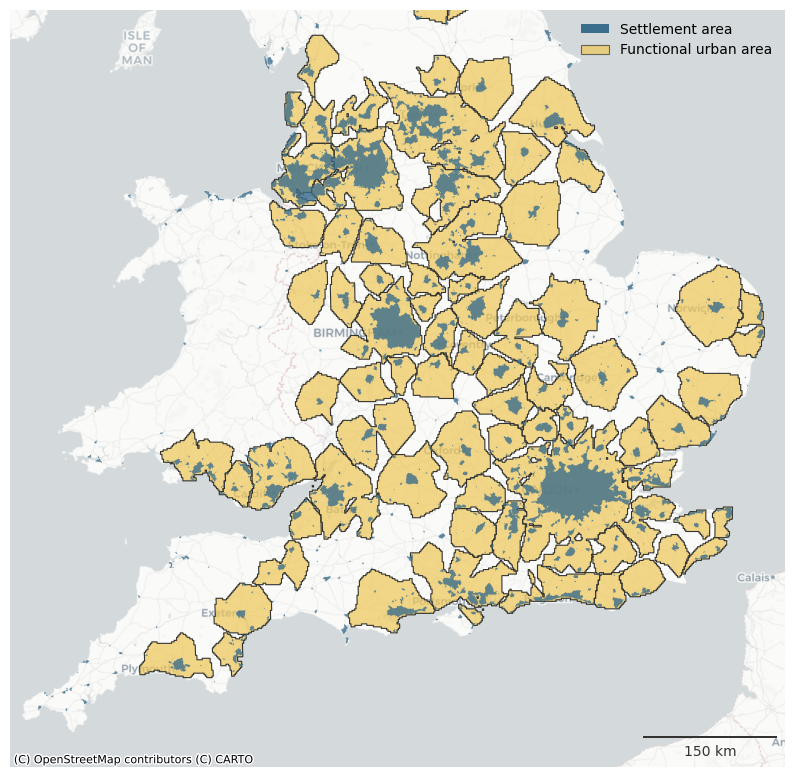

In [225]:
ax = bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8)
# bds_plot.boundary.plot(ax=ax, color=ugg.COLORS[0], linewidth=.75)
fua_plot.plot(ax=ax, alpha=.7, color=ugg.COLORS[4])
# fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[4], linewidth=1)
fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[0], linewidth=.8)
ax.set_ylim(6400000, 7250000)
ax.set_xlim(-650000, 220000)
ax.set_axis_off()
cx.add_basemap(ax=ax, source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
    Patch(facecolor=ugg.COLORS[4], alpha=.7, edgecolor=ugg.COLORS[0], linewidth=.8, label='Functional urban area'),
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

plt.savefig("figs/overlay_set_fua.png", dpi=144, bbox_inches="tight")

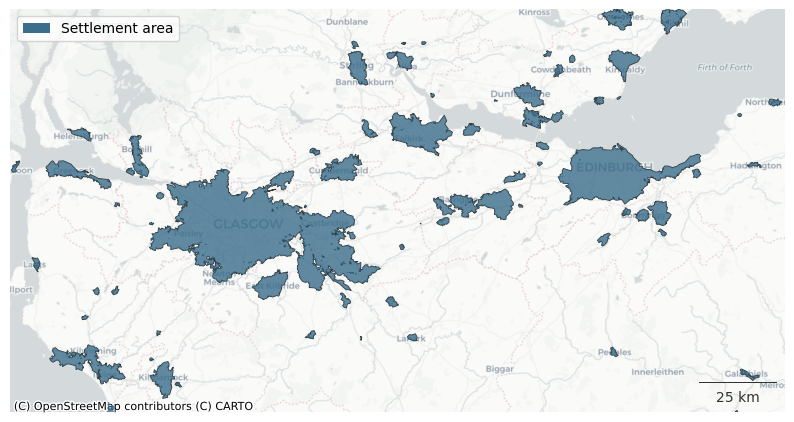

In [240]:
ax = bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8)
bds_plot.boundary.plot(ax=ax, color=ugg.COLORS[0], linewidth=.75)
# fua_plot.plot(ax=ax, alpha=.7, color=ugg.COLORS[4])
ax.set_ylim(7470000, 7600000)
ax.set_xlim(-550000, -300000)
ax.set_axis_off()
cx.add_basemap(ax=ax, source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
]
ax.legend(handles=legend_elements, loc='upper left', frameon=True)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

plt.savefig("figs/settlements_scotland.png", dpi=144, bbox_inches="tight")

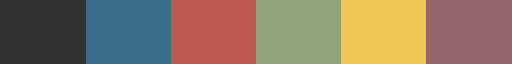

In [173]:
ugg.CMAP

In [111]:
fua.area.max() / 1000000

6605.0

In [120]:
settlement_boundaries

geometry  \
settlement                                                      
0           POLYGON Z ((142667.472 932126.244 0.000, 14264...   
3           POLYGON Z ((163950.904 40031.623 0.000, 163950...   
5           POLYGON Z ((167036.075 42671.447 0.000, 167034...   
8           POLYGON Z ((169788.398 41575.672 0.000, 169777...   
10          POLYGON Z ((175581.974 54311.766 0.000, 175582...   
...                                                       ...   
9497        POLYGON Z ((501071.199 203479.014 0.000, 50107...   
9526        POLYGON Z ((504988.264 302841.508 0.000, 50499...   
9592        POLYGON Z ((515161.410 416170.202 0.000, 51516...   
9777        POLYGON Z ((560071.598 165353.771 0.000, 56007...   
9822        POLYGON Z ((584270.281 332038.541 0.000, 58427...   

                            name      area  
settlement                                  
0                      Stornoway  1.726063  
3                       Camborne  3.282427  
5                        Illogan  0.593929  
8                        Redruth  2.543934  
10                   Perranporth  0.383067  
...                          ...       ...  
9497                   Bovingdon  0.298797  
9526                   Wittering  0.444567  
9592                        None  0.015553  
9777               New Ash Green  0.644549  
9822        Wicken Green Village  0.066374  

[1208 rows x 3 columns]

In [119]:
(settlement_boundaries['area'] < 1).sum()

584

In [116]:
settlement_boundaries.loc[[5271]].explore()

In [33]:
areas_sorted["name"] = settlement_boundaries["name"]

In [35]:
plot_data = areas_sorted.set_index("name", drop=True)

In [56]:
plot_data.index.name = "Settlement"
plot_data.columns.name = "Signature type"

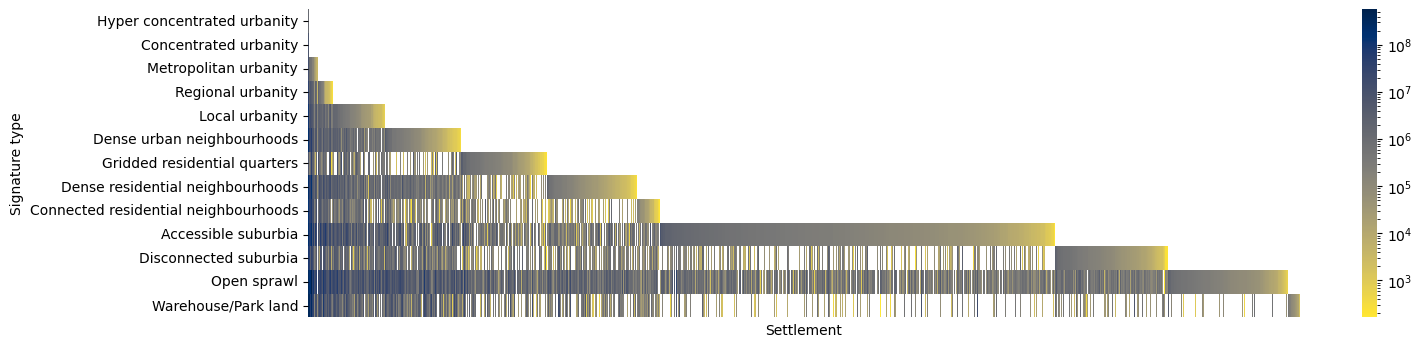

In [58]:
plt.subplots(figsize=(16, 4))
ax = sns.heatmap(data=plot_data.T, norm=LogNorm(), cmap="cividis_r")
plt.tick_params(
    axis='x',     
    which='both', 
    bottom=False,     
    top=False,         
    labelbottom=False)
plt.savefig("hierarchy.pdf")

In [79]:
plot_data.index[12:20]

Index(['Plymouth', 'Sunderland - Newcastle upon Tyne', 'Aberdeen',
       'Nottingham', 'Norwich', 'Scarborough',
       'Skelton - Saltburn-by-the-Sea - Brotton - Marske-by-the-Sea - Redcar - Yarm - Thornaby-on-Tees - Stockton-on-Tees - Billingham - Middlesbrough - Hartlepool',
       'Abertawe'],
      dtype='object', name='Settlement')

In [89]:
plot_data.index[1040:1045]

Index(['Coundon', 'New Ash Green', 'Hamble-le-Rice', None, 'Long Buckby'], dtype='object', name='Settlement')

In [139]:
settlement_sig_area = with_names.groupby(["settlement", "signature_type"])["area"].sum()

In [146]:
settlement_sig_area.xs("Accessible suburbia", level=1)

settlement
0       9.843275e+04
3       1.941262e+05
5       9.879056e+03
8       1.610704e+05
10      6.876061e+03
            ...     
2759    2.782918e+05
2760    7.113730e+05
2761    3.394846e+06
2762    7.550956e+06
2765    2.403334e+04
Name: area, Length: 857, dtype: float64

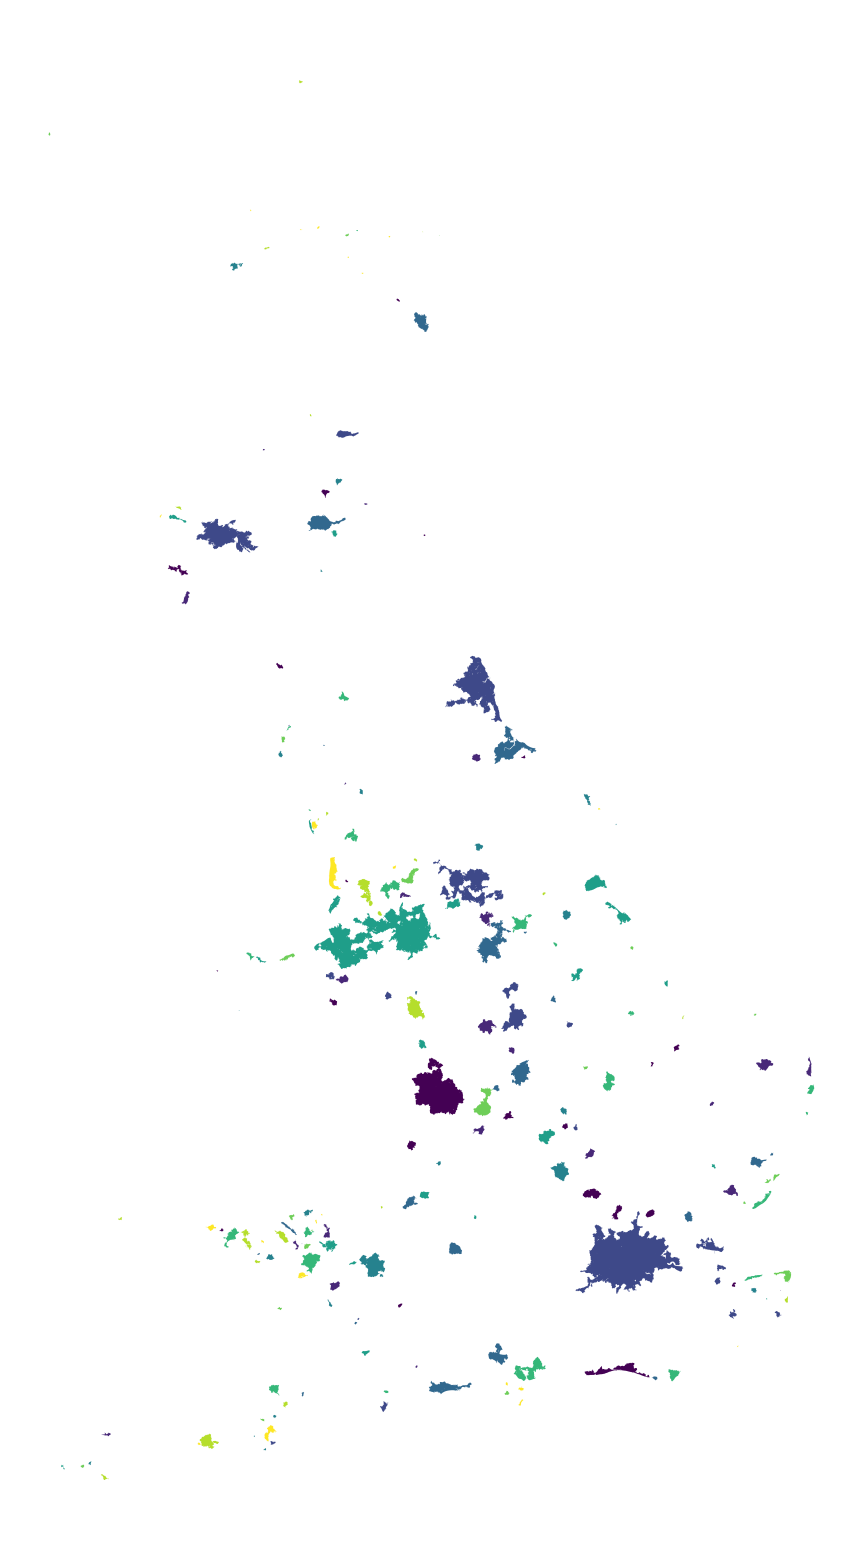

In [158]:
settlement_boundaries.assign(sig_area=settlement_sig_area.xs("Gridded residential quarters", level=1) / settlement_boundaries.area).plot("sig_area", figsize=(20, 20), scheme="quantiles", k=10s).set_axis_off()

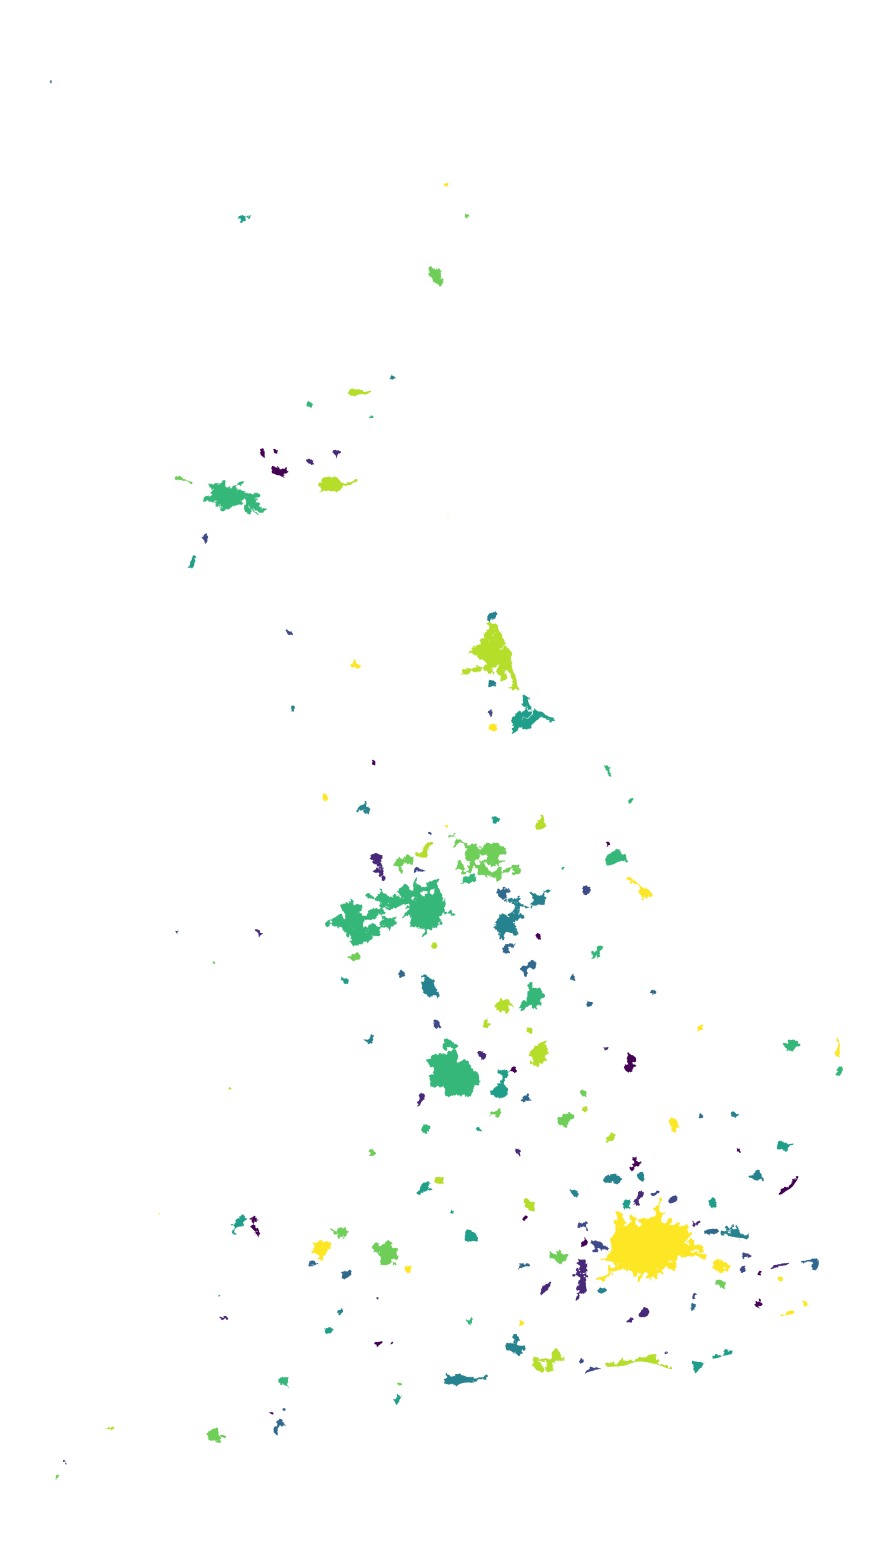

In [157]:
settlement_boundaries.assign(sig_area=settlement_sig_area.xs("Dense urban neighbourhoods", level=1) / settlement_boundaries.area).plot("sig_area", figsize=(20, 20), scheme="quantiles", k=10).set_axis_off()

In [162]:
with_names.groupby(["signature_type"])["area"].sum().sort_values() / 1000000

signature_type
Hyper concentrated urbanity                1.306332
Concentrated urbanity                      7.884144
Metropolitan urbanity                     16.523881
Regional urbanity                         76.432434
Local urbanity                           231.114682
Gridded residential quarters             260.548485
Connected residential neighbourhoods     564.556224
Dense urban neighbourhoods               570.643221
Disconnected suburbia                    698.800932
Dense residential neighbourhoods         956.964941
Accessible suburbia                     2194.269106
Warehouse/Park land                     2441.457800
Open sprawl                             4968.897217
Name: area, dtype: float64